In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
import numpy as np
import DataPreprocess as DP
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
train = DP.getProcessedData("訓練用.csv")


In [3]:
train

,LandValue,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,BuildComDate,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,AplraiseValue
0,152000,2.90,A,04,R2,12.29,1993,3.22,板橋區,新北市,5,18.41,7821700
1,151179,3.20,A,04,R2,22.12,1995,3.38,三重區,新北市,5,28.70,12272000
2,106482,5.11,C,04,R2,28.67,1996,2.81,土城區,新北市,5,36.59,11762800
3,11800,40.82,A,04,R5,64.43,1993,10.10,南投市,南投縣,1,115.35,4710420
4,33549,5.54,A,04,R2,23.02,1994,6.87,大寮區,高雄市,3,35.43,3299200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,35818,11.70,A,04,R2,66.65,1998,3.88,竹北市,新竹縣,3,82.23,10288500
3493,20000,23.90,A,08,R5,26.43,1985,2.36,大寮區,高雄市,3,52.69,4494850
3494,123000,2.11,A,04,R2,17.24,2004,1.55,新莊區,新北市,5,20.90,6507800
3495,148000,5.32,B,04,R1,23.27,1980,0.00,新莊區,新北市,5,28.59,10006100


In [4]:
#查看遺失值及遺失率
train_data_na = (train.isnull().sum() / len(train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio of train data' :train_data_na})
missing_data.head(10)

,Missing Ratio of train data
BuildComDate,0.028596
BuildMaterial,0.028596
BuildPurpose,0.028596


In [5]:
#找出遺失值所在欄物並觀察
ind = train[train["BuildMaterial"].isnull()].index

train.iloc[ind]


,LandValue,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,BuildComDate,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,AplraiseValue
3434,0,6.2,NaN,NaN,R2,39.33,NaN,0.0,左營區,高雄市,3,45.53,0


In [6]:
#刪除第3434列
train.drop(ind,inplace=True)
train.reset_index(drop = True , inplace = True)

In [7]:
train

,LandValue,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,BuildComDate,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,AplraiseValue
0,152000,2.90,A,04,R2,12.29,1993,3.22,板橋區,新北市,5,18.41,7821700
1,151179,3.20,A,04,R2,22.12,1995,3.38,三重區,新北市,5,28.70,12272000
2,106482,5.11,C,04,R2,28.67,1996,2.81,土城區,新北市,5,36.59,11762800
3,11800,40.82,A,04,R5,64.43,1993,10.10,南投市,南投縣,1,115.35,4710420
4,33549,5.54,A,04,R2,23.02,1994,6.87,大寮區,高雄市,3,35.43,3299200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,35818,11.70,A,04,R2,66.65,1998,3.88,竹北市,新竹縣,3,82.23,10288500
3492,20000,23.90,A,08,R5,26.43,1985,2.36,大寮區,高雄市,3,52.69,4494850
3493,123000,2.11,A,04,R2,17.24,2004,1.55,新莊區,新北市,5,20.90,6507800
3494,148000,5.32,B,04,R1,23.27,1980,0.00,新莊區,新北市,5,28.59,10006100


In [8]:
test = DP.getProcessedData("驗證用.csv")

In [9]:
test_data_na = (test.isnull().sum() / len(test)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :test_data_na})
missing_data.head(10)

,Missing Ratio


In [10]:
test

,LandValue,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,BuildComDate,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,AplraiseValue
0,73000,30.60,A,11,R2,59.76,2014,5.84,西屯區,台中市,3,96.20,22432000
1,51900,27.17,Z,4,R5,57.55,2015,3.55,北屯區,台中市,3,88.27,15332200
2,53700,13.91,A,8,R5,38.66,1974,0.00,平鎮區,桃園市,3,52.57,11831040
3,209000,16.87,A,4,R1,27.01,1973,3.38,北投區,台北市,6,47.26,12763800
4,54258,3.31,A,4,R2,25.49,1994,3.15,永康區,台南市,3,31.95,4194280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,75100,44.75,H,4,R5,61.13,1985,8.20,土城區,新北市,5,114.08,28236600
881,89600,10.89,A,8,R1,16.52,1977,0.00,汐止區,新北市,4,27.41,3964800
882,89900,32.97,Z,4,R5,109.52,1989,0.00,桃園區,桃園市,3,142.49,19334800
883,61500,39.57,F,4,R5,78.58,1989,8.33,西屯區,台中市,3,126.48,16587165


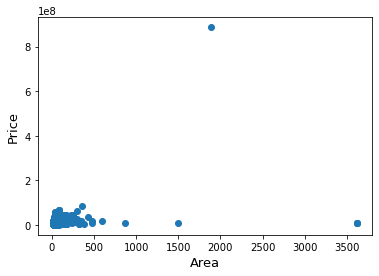

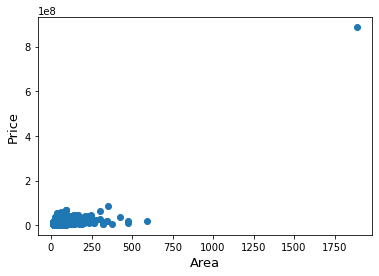

In [11]:
fig, ax = plt.subplots()
ax.scatter(train['TotalArea'], train['AplraiseValue'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

#刪除面積大於750及價格小於一億的資料
train = train.drop(train[(train['TotalArea']>750) & (train['AplraiseValue']<100000000)].index)
train = train.drop(train[train['AplraiseValue']== 0].index)

fig, ax = plt.subplots()
ax.scatter(train['TotalArea'], train['AplraiseValue'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()


C:\Users\fb6587\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 9636760.66 and sigma = 16456604.34



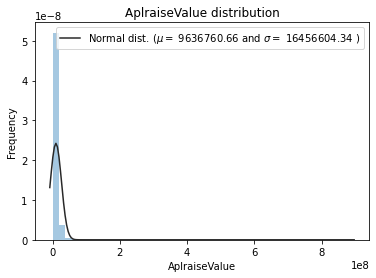

<Figure size 432x288 with 0 Axes>

In [12]:
train["AplraiseValue"] = train["AplraiseValue"].astype('float64')
sns.distplot(train['AplraiseValue'],kde = False , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['AplraiseValue'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AplraiseValue distribution')

fig = plt.figure()
# res = stats.probplot(train['AplraiseValue'], plot=plt)
plt.show()

In [13]:
train["AplraiseValue"].max()

886830150.0

In [14]:
train["AplraiseValue"].min()

1078350.0

In [15]:
train["AplraiseValue"].mean()

9636760.66294067

C:\Users\fb6587\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 15.85 and sigma = 0.64



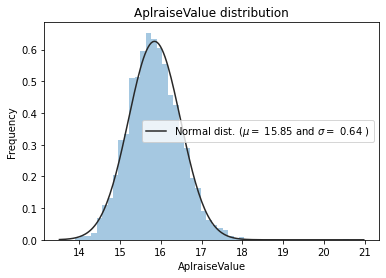

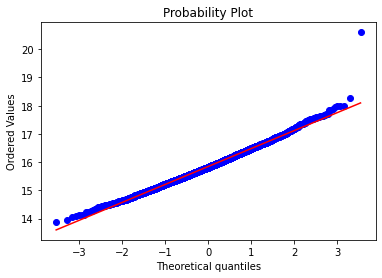

51


In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

train["AplraiseValue"] = np.log1p(train["AplraiseValue"].astype('float64'))

#Check the new distribution 
sns.distplot(train['AplraiseValue'] ,kde = False, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['AplraiseValue'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AplraiseValue distribution')

#Get also the QQ-plot
plt.figure()
res=stats.probplot( train['AplraiseValue'], plot=plt)
plt.show()

ind=train[train['AplraiseValue']> 20].index
for i in ind: 
    print(i)

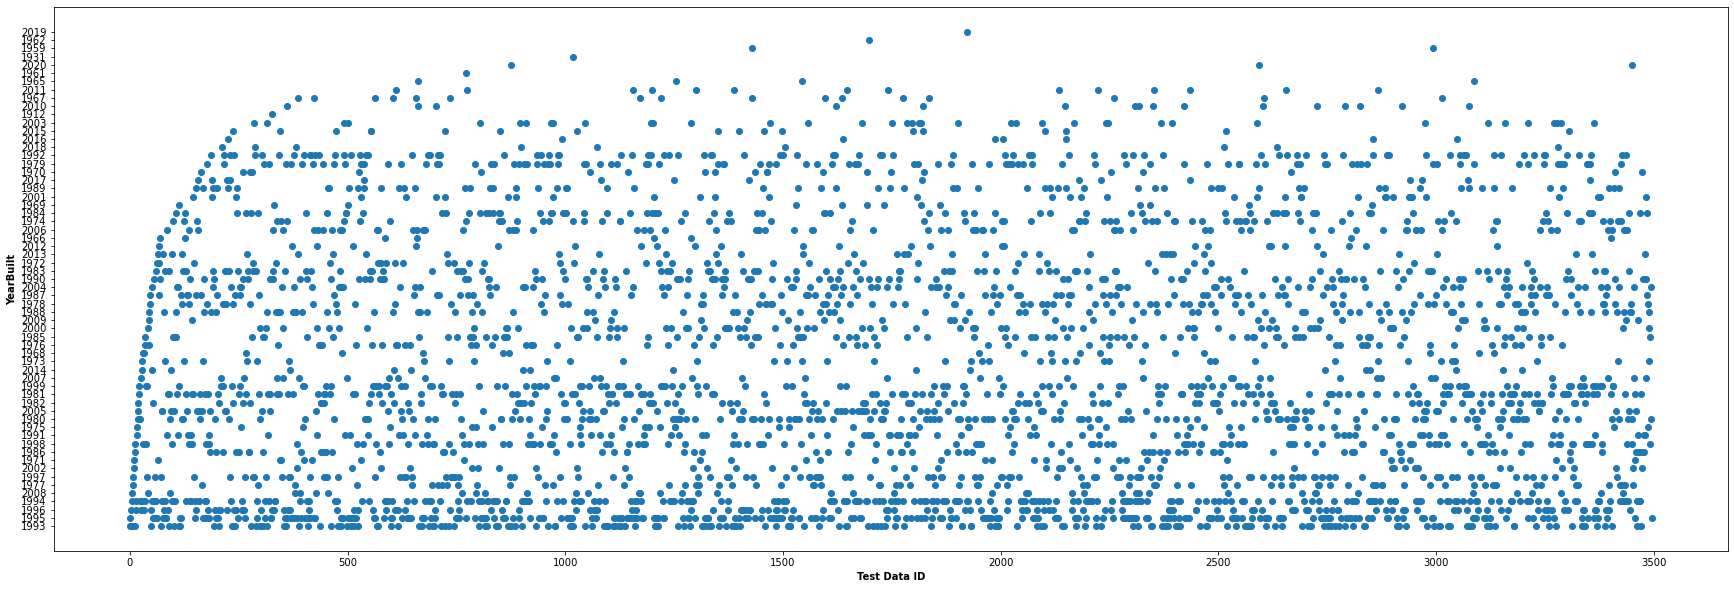

In [17]:
plt.figure(figsize =(30,10))
plt.xlabel("Test Data ID", fontweight = "bold")               
plt.ylabel("YearBuilt", fontweight = "bold")

plt.scatter(train.index,train['BuildComDate'].fillna('None'))
plt.draw()

#新增HouseAge特徵
train["HouseAge"] = 2020- train["BuildComDate"].astype(int)
test["HouseAge"] = 2020- test["BuildComDate"].astype(int)

train.drop(["BuildComDate"],axis=1,inplace = True)
test.drop(["BuildComDate"],axis=1,inplace = True)

In [18]:
#重新排序欄位的順序
train = train[["LandValue","LandHoldArea","BuildPurpose","BuildMaterial","BuildType","BuildLayerArea","AdjBuildArea",
                   "AreaItem","CityItem","AreaRank","TotalArea","HouseAge","AplraiseValue"]]

test = test[["LandValue","LandHoldArea","BuildPurpose","BuildMaterial","BuildType","BuildLayerArea","AdjBuildArea",
                   "AreaItem","CityItem","AreaRank","TotalArea","HouseAge","AplraiseValue"]]

In [19]:
#實價登錄資料無此特徵
train.drop(['LandValue'],axis=1,inplace = True)
test.drop(['LandValue'],axis=1,inplace = True)

C:\Users\fb6587\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

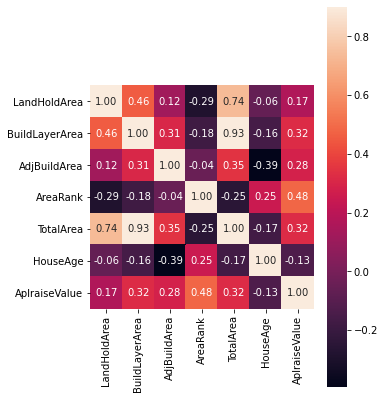

In [20]:
corrmat = train.corr()
plt.subplots(figsize=(5,7))
sns.heatmap(corrmat, cbar=True, annot=True, vmax=0.9, square=True,fmt='.2f')
# train.corr()['AplraiseValue']

Text(0.5, 1.0, 'Correlation of Aplraise Value')

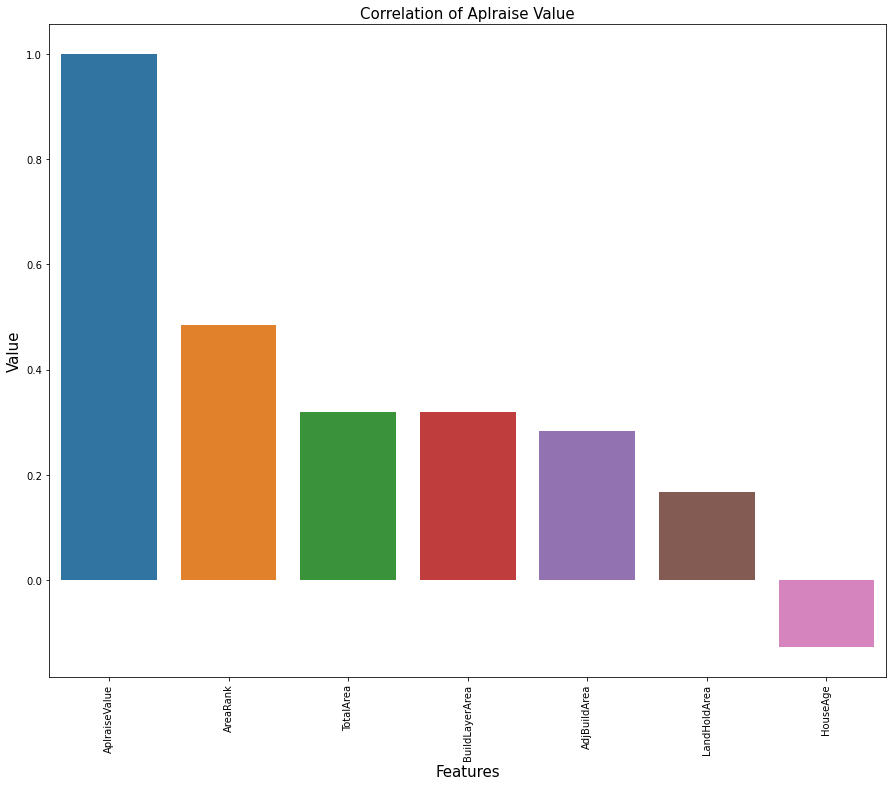

In [21]:
AplraiseValueCorr = train.corr()['AplraiseValue'].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=AplraiseValueCorr.index, y=AplraiseValueCorr.values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Correlation of Aplraise Value', fontsize=15)

In [22]:
#實價登錄資料
RealPrice = pd.read_csv('./RealPrice.csv')
RealPrice.drop(['SerialNumber'], axis=1, inplace=True)
RealPrice = RealPrice.drop(RealPrice[RealPrice['BuildLayerArea']== 0.0].index)
RealPrice.shape

(865808, 10)

In [23]:
RealPrice

,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,AdjBuildArea,AreaItem,Price,CityItem,HouseAge
0,0.28,P,11,99,40.77,0,中正區,3100000,台北市,12.0904
1,0.02,Z,08,R2,42.72,0,中正區,51983,台北市,49.0505
2,6.72,A,04,R2,72.47,0,中正區,12250000,台北市,36.9781
3,213.58,A,04,R2,450.19,0,文山區,47000000,台北市,6.9905
6,23.50,A,04,R2,119.40,0,中正區,32700000,台北市,33.0098
...,...,...,...,...,...,...,...,...,...,...
1237457,69.26,F,04,R5,256.62,0,馬公市,15000000,澎湖縣,26.0293
1237467,62.23,A,12,R5,81.30,0,馬公市,6000000,澎湖縣,40.9895
1237468,22.00,F,12,R5,65.55,0,馬公市,7400000,澎湖縣,45.0306
1237476,26.95,Z,04,R2,181.29,0,馬公市,4800000,澎湖縣,13.9694


In [24]:
RealPrice_na = (RealPrice.isnull().sum() / len(RealPrice)) * 100
RealPrice_na =RealPrice_na.drop(RealPrice_na[RealPrice_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :RealPrice_na})
missing_data.head(10)

,Missing Ratio


In [25]:
#新增實價登錄資料AreaRank特徵
RealPrice["AreaRank"] = RealPrice["CityItem"].map({"屏東縣":1,"台東縣":1,"嘉義縣":1,"嘉義市":1,"南投縣":1,"連江縣":1,
                                           "雲林縣":2,"澎湖縣":2,"彰化縣":2,"苗栗縣":2,
                                           "台南市":3,"基隆市":3,"花蓮縣":3,"高雄市":3,"宜蘭縣":3,"桃園市":3,"台中市":3,"新竹縣":3,"新竹市":3,"金門縣":3,"澎湖縣":3,
                                           "新北市":4,
                                           "台北市":6})
newTaipei = {"永和區","板橋區", "中和區","三重區","新店區","蘆洲區","新莊區","土城區"}  
Taipei = {"大安區","信義區", "中正區","松山區","中山區"}

for index in RealPrice.index:
    if(RealPrice["CityItem"][index] == "台北市"):
        if(RealPrice["AreaItem"][index] in Taipei):
                RealPrice.loc[index,"AreaRank"]= RealPrice["AreaRank"][index]+1
    elif(RealPrice["CityItem"][index] == "新北市"):
        if(RealPrice["AreaItem"][index] in newTaipei):
                RealPrice.loc[index,"AreaRank"]= RealPrice["AreaRank"][index]+1

In [26]:
#新增實價登錄資料TotalArea特徵
RealPrice['TotalArea']=RealPrice["BuildLayerArea"] + RealPrice["AdjBuildArea"]+RealPrice['LandHoldArea']

In [27]:
RealPrice = RealPrice[["LandHoldArea","BuildPurpose","BuildMaterial","BuildType","BuildLayerArea","AdjBuildArea",
                   "AreaItem","CityItem","AreaRank","TotalArea","HouseAge","Price"]]

In [28]:
print(RealPrice.describe())

       LandHoldArea  BuildLayerArea  AdjBuildArea       AreaRank  \
count  8.658080e+05    8.658080e+05      865808.0  865808.000000   
mean   7.087251e+01    1.631001e+02           0.0       3.442301   
std    1.751350e+03    1.209990e+03           0.0       1.283003   
min    0.000000e+00    1.000000e-02           0.0       1.000000   
25%    1.515000e+01    9.372000e+01           0.0       3.000000   
50%    2.508000e+01    1.359600e+02           0.0       3.000000   
75%    5.727000e+01    1.836200e+02           0.0       4.000000   
max    1.044217e+06    1.060815e+06           0.0       7.000000   

          TotalArea       HouseAge         Price  
count  8.658080e+05  865808.000000  8.658080e+05  
mean   2.339726e+02      13.827313  1.147247e+07  
std    2.176793e+03      15.145444  3.396595e+07  
min    1.000000e-02    -734.001300  0.000000e+00  
25%    1.193400e+02       0.041800  4.800000e+06  
50%    1.684100e+02       8.919900  7.950000e+06  
75%    2.439300e+02      24.93

In [29]:
RealPrice.dtypes

LandHoldArea      float64
BuildPurpose       object
BuildMaterial      object
BuildType          object
BuildLayerArea    float64
AdjBuildArea        int64
AreaItem           object
CityItem           object
AreaRank            int64
TotalArea         float64
HouseAge          float64
Price               int64
dtype: object

In [30]:
train.dtypes

LandHoldArea      float64
BuildPurpose       object
BuildMaterial      object
BuildType          object
BuildLayerArea    float64
AdjBuildArea      float64
AreaItem           object
CityItem           object
AreaRank            int64
TotalArea         float64
HouseAge            int32
AplraiseValue     float64
dtype: object

In [31]:
RealPrice["AdjBuildArea"]=RealPrice["AdjBuildArea"].astype(float)
RealPrice["Price"]=RealPrice["Price"].astype(float)


In [32]:
#刪除實價登錄中無建物的資料
ind = RealPrice[RealPrice["BuildLayerArea"]==0].index
print(len(ind))
RealPrice.drop(ind,inplace=True)
RealPrice.reset_index(drop = True , inplace = True)

0


In [33]:
#刪除實價登錄中交易價格為0的資料
ind = RealPrice[RealPrice["Price"]==0].index
print(len(ind))
ind
RealPrice.drop(ind,inplace=True)
RealPrice.reset_index(drop = True , inplace = True)

69


In [34]:
#刪除實價登錄中交易價格大於3億的資料
ind = RealPrice[RealPrice["Price"]>300000000].index
print(len(ind))
ind
RealPrice.drop(ind,inplace=True)
RealPrice.reset_index(drop = True , inplace = True)

630


In [35]:
#刪除實價登錄中屋齡小於0的資料
ind = RealPrice[RealPrice["HouseAge"]<0].index
print(len(ind))
ind
RealPrice.drop(ind,inplace=True)
RealPrice.reset_index(drop = True , inplace = True)

95860


In [36]:
print(RealPrice.isnull().any())

LandHoldArea      False
BuildPurpose      False
BuildMaterial     False
BuildType         False
BuildLayerArea    False
AdjBuildArea      False
AreaItem          False
CityItem          False
AreaRank          False
TotalArea         False
HouseAge          False
Price             False
dtype: bool


<Figure size 2880x2160 with 0 Axes>

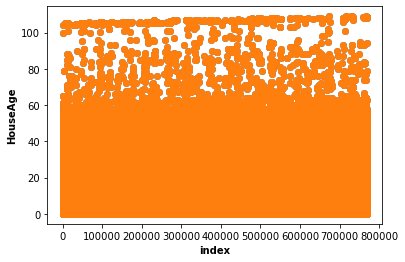

In [37]:
plt.figure(figsize =(40,30))
fig,ax = plt.subplots()
ax.scatter(x = RealPrice.index, y = RealPrice['HouseAge'])
plt.xlabel('index', fontweight = "bold")               
plt.ylabel("HouseAge", fontweight = "bold")

plt.scatter(RealPrice.index,RealPrice['HouseAge'])
plt.draw()

<Figure size 2880x2160 with 0 Axes>

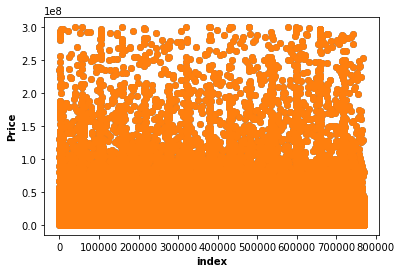

In [38]:
plt.figure(figsize =(40,30))
fig,ax = plt.subplots()
ax.scatter(x = RealPrice.index, y = RealPrice['Price'])
plt.xlabel('index', fontweight = "bold")               
plt.ylabel("Price", fontweight = "bold")

plt.scatter(RealPrice.index,RealPrice['Price'])
plt.draw()

<Figure size 2880x2160 with 0 Axes>

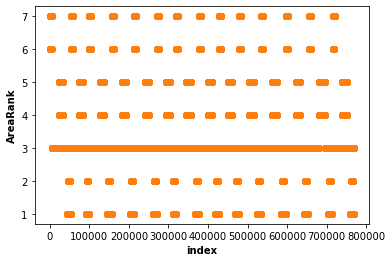

In [39]:
plt.figure(figsize =(40,30))
fig,ax = plt.subplots()
ax.scatter(x = RealPrice.index, y = RealPrice['AreaRank'])
plt.xlabel('index', fontweight = "bold")               
plt.ylabel("AreaRank", fontweight = "bold")

plt.scatter(RealPrice.index,RealPrice['AreaRank'])
plt.draw()

<Figure size 2880x2160 with 0 Axes>

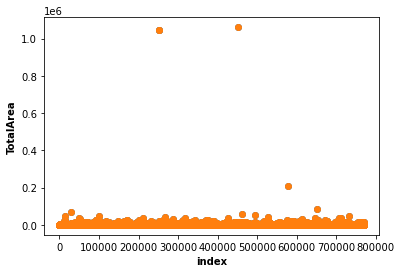

In [40]:
plt.figure(figsize =(40,30))
fig,ax = plt.subplots()
ax.scatter(x = RealPrice.index, y = RealPrice['TotalArea'])
plt.xlabel('index', fontweight = "bold")               
plt.ylabel("TotalArea", fontweight = "bold")

plt.scatter(RealPrice.index,RealPrice['TotalArea'])
plt.draw()

In [41]:
RealPrice['HouseAge'].max()

109.03200000000001

In [42]:
RealPrice['HouseAge'].min()

0.0

In [43]:
RealPrice['HouseAge'].mean()

15.753598251669423

In [44]:
RealPrice['Price'].max()

300000000.0

In [45]:
RealPrice['Price'].min()

110.0

In [46]:
RealPrice['Price'].mean()

10802309.952171534

In [47]:
RealPrice['TotalArea'].max()

1060829.14

In [48]:
RealPrice['TotalArea'].min()

0.01

In [49]:
RealPrice['TotalArea'].mean()

226.23465381170263

In [50]:
ntrain = train.shape[0]
ntest = test.shape[0]
nRealPrice = RealPrice.shape[0]
Y_train = train.AplraiseValue.values
AcctualValues = test.AplraiseValue.values
RealPriceValue = RealPrice.Price.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['AplraiseValue'], axis=1, inplace=True)
RealPrice.drop(['Price'], axis=1, inplace=True)
all_data = pd.concat((all_data, RealPrice)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))
all_data

all_data size is : (773623, 11)


,LandHoldArea,BuildPurpose,BuildMaterial,BuildType,BuildLayerArea,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,HouseAge
0,2.90,A,04,R2,12.29,3.22,板橋區,新北市,5,18.41,27.0000
1,3.20,A,04,R2,22.12,3.38,三重區,新北市,5,28.70,25.0000
2,5.11,C,04,R2,28.67,2.81,土城區,新北市,5,36.59,24.0000
3,40.82,A,04,R5,64.43,10.10,南投市,南投縣,1,115.35,27.0000
4,5.54,A,04,R2,23.02,6.87,大寮區,高雄市,3,35.43,26.0000
...,...,...,...,...,...,...,...,...,...,...,...
773618,69.26,F,04,R5,256.62,0.00,馬公市,澎湖縣,3,325.88,26.0293
773619,62.23,A,12,R5,81.30,0.00,馬公市,澎湖縣,3,143.53,40.9895
773620,22.00,F,12,R5,65.55,0.00,馬公市,澎湖縣,3,87.55,45.0306
773621,26.95,Z,04,R2,181.29,0.00,馬公市,澎湖縣,3,208.24,13.9694


In [51]:
all_data["BuildMaterial"] = all_data["BuildMaterial"].astype(str)

In [52]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skewness
BuildLayerArea,830.494098
LandHoldArea,563.752622
TotalArea,458.984877
AdjBuildArea,36.105803
AreaRank,0.852614
HouseAge,0.649134



 mu = 156.78 and sigma = 1229.33



C:\Users\fb6587\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


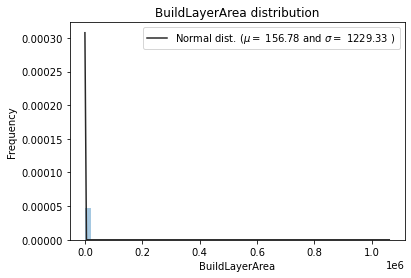

<Figure size 432x288 with 0 Axes>

In [53]:

sns.distplot(all_data['BuildLayerArea'],kde = False , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['BuildLayerArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('BuildLayerArea distribution')

fig = plt.figure()
# res = stats.probplot(train['AplraiseValue'], plot=plt)
plt.show()

In [54]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# λ是轉換參數，它介於-5到5之間。某些λ值會對應到其他的轉換方法，
# 例如λ=1等於沒做轉換，λ=0是對數轉換，λ=0.5， 是平方根轉換，λ=-1倒數轉換。
# 要轉換的資料值必須是正數才能使用Box-Cox轉換。

# y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
#    log(1+x)                    if lmbda == 0

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 6 skewed numerical features to Box Cox transform


C:\Users\fb6587\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 7.16 and sigma = 1.32



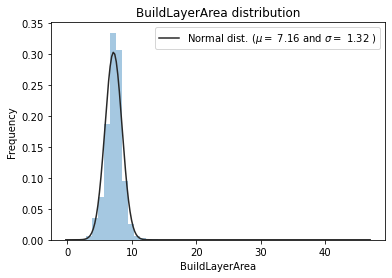

<Figure size 432x288 with 0 Axes>

In [55]:
sns.distplot(all_data['BuildLayerArea'],kde = False , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['BuildLayerArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('BuildLayerArea distribution')

fig = plt.figure()
# res = stats.probplot(train['AplraiseValue'], plot=plt)
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
cols = ('AreaItem', 'CityItem')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [57]:

all_data.to_csv('./all_data.csv',encoding='utf_8_sig', index=False)
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(773623, 57)


In [58]:
all_data

,LandHoldArea,BuildLayerArea,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,HouseAge,BuildPurpose_A,BuildPurpose_B,...,BuildType_99,BuildType_B1,BuildType_B2,BuildType_B3,BuildType_R1,BuildType_R2,BuildType_R3,BuildType_R4,BuildType_R5,BuildType_R6
0,1.509852,3.160707,1.607145,187,11,2.055642,3.735231,4.322948,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.601251,4.011751,1.653458,11,11,2.055642,4.420542,4.201461,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2.079443,4.418861,1.481267,87,11,2.055642,4.819354,4.137711,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.004556,5.815078,2.898823,68,0,0.730463,6.940688,4.322948,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2.169124,4.073096,2.417915,106,21,1.540963,4.765476,4.263161,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773618,5.949138,8.663811,0.000000,335,15,1.540963,9.221251,4.264939,0,0,...,0,0,0,0,0,0,0,0,1,0
773619,5.751206,6.252030,0.000000,335,15,1.540963,7.390650,5.011639,1,0,...,0,0,0,0,0,0,0,0,1,0
773620,4.003419,5.846895,0.000000,335,15,1.540963,6.394652,5.173716,0,0,...,0,0,0,0,0,0,0,0,1,0
773621,4.320002,7.888701,0.000000,335,15,1.540963,8.192876,3.337695,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
train = all_data[:ntrain]
# test = all_data[ntrain:]
test = all_data[ntrain:ntrain+ntest]
test_RealPrice= all_data[ntrain+ntest:]
print(Y_train.shape)
print(train.shape)

(3489,)
(3489, 57)


In [60]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [61]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [62]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3800 (0.0052)



In [63]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



ElasticNet score: 0.3816 (0.0067)



In [64]:
KRR = KernelRidge(alpha=9, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3944 (0.0046)



In [65]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[17:23:33] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:37] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:40] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:43] WARNING: ..

In [66]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=18,
                              learning_rate=0.1, n_estimators=1080,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

print(score)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [67]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
       
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        
        return self.meta_model_.predict(meta_features)

In [68]:
stacked_averaged_models = StackingAveragedModels(base_models = (lasso,ENet),
                                                 meta_model = KRR)
score = rmsle_cv(stacked_averaged_models)
print("stacked_averaged_models score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))
stacked_averaged_models.fit(train.values, Y_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

stacked_averaged_models score: 0.3831 (0.0081)



In [69]:
model_lgb.fit(train, Y_train)
lgb_pred = np.expm1(model_lgb.predict(test.values))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [70]:
print(train.shape)
print(test.shape)

train_x = train.values
test_x = test.values
model_xgb.fit(train_x, Y_train)
# test= test[model_xgb.get_booster().feature_names]
xgb_pred = np.expm1(model_xgb.predict(test_x))


(3489, 57)
(885, 57)
[17:24:00] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [71]:
#RMSE
print ('RMSE of stacked_pred is : ',np.sqrt(mean_squared_error(AcctualValues,stacked_pred)))

#R Squared
print ('R Squared of stacked_pred is : ',1- mean_squared_error(AcctualValues,stacked_pred)/ np.var(AcctualValues))

RMSE of stacked_pred is :  5024995.995873644
R Squared of stacked_pred is :  0.7328777357869135


In [72]:
#RMSE
print ('RSME of lgb_pred is : ',np.sqrt(mean_squared_error(AcctualValues,lgb_pred)))

#R Squared
print ('R Squared of lgb_pred is : ',1- mean_squared_error(AcctualValues,lgb_pred)/ np.var(AcctualValues))

RSME of lgb_pred is :  5143245.155917763
R Squared of lgb_pred is :  0.7201578694052738


In [73]:
#RMSE
print ('RMSE of xgb_pred is : ',np.sqrt(mean_squared_error(AcctualValues,xgb_pred)))

#R Squared
print ('R Squared of xgb_pred is : ',1- mean_squared_error(AcctualValues,xgb_pred)/ np.var(AcctualValues))

RMSE of xgb_pred is :  4026569.954525377
R Squared of xgb_pred is :  0.8284822209694188


In [74]:
# ensemble = stacked_pred*0.3 + lgb_pred*0.6 + xgb_pred*0.1   

# ensemble = stacked_pred*0.3 + lgb_pred*0.1 + xgb_pred*0.6   
ensemble = stacked_pred*0.1 + lgb_pred*0.3 + xgb_pred*0.6

In [75]:
print(ensemble)

[34733916.87880881 19593364.98312866  7484912.53686194 14077840.18327739
  5392745.09031034 11731413.27990259  6314704.7514037   3120255.44533167
 12027978.33012065  4142762.39929443 10731523.70657173 10373986.72305603
  6617235.84083556  3270699.35232469  9726500.51137796  6114331.73483632
  6055922.62057285  5570643.84508961 18965351.75470591 12472846.30373381
  5091785.36319477  9983361.33027196  3110125.47812648 14092087.98027182
  6949483.66292575  9919581.07262371  3976917.4431856  17466629.46811413
 10285346.41529868  7183906.00817546  8894923.9490885  14171544.08649949
  6601469.79699762  5488941.70985927  4509129.12141099 16293226.35807372
 16810250.28151561 13806091.63034767  9273401.23767309  7897707.67393334
 24048420.69998141  6557875.94505628  5292969.36651369  8753074.76601911
  9087426.35491291 16334178.21869417 10506298.35585104  3844595.13121671
 15522672.04991998 21747878.38399544  7468530.28273019 12688641.03113933
 23761176.79537279 13814301.24373351  3212555.21875

In [76]:
#RMSE
print ('RMSE is : ',np.sqrt(mean_squared_error(AcctualValues,ensemble)))

RMSE is :  3953108.9148023063


In [77]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(AcctualValues,ensemble)/ np.var(AcctualValues))

R Squared is :  0.8346834979868675


In [78]:
test_RealPrice['HouseAge'] = test_RealPrice['HouseAge'].fillna(0)
test_RealPrice

<ipython-input-78-362d5b1305e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_RealPrice['HouseAge'] = test_RealPrice['HouseAge'].fillna(0)


,LandHoldArea,BuildLayerArea,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,HouseAge,BuildPurpose_A,BuildPurpose_B,...,BuildType_99,BuildType_B1,BuildType_B2,BuildType_B3,BuildType_R1,BuildType_R2,BuildType_R3,BuildType_R4,BuildType_R5,BuildType_R6
4374,0.251488,5.002462,0.0,19,2,2.440268,5.014162,3.138425,0,0,...,1,0,0,0,0,0,0,0,0,0
4375,0.019832,5.082600,0.0,19,2,2.440268,5.083406,5.323356,0,0,...,0,0,0,0,0,1,0,0,0,0
4376,2.391730,6.033963,0.0,19,2,2.440268,6.201799,4.837065,1,0,...,0,0,0,0,0,1,0,0,0,0
4377,8.249153,10.008211,0.0,153,2,2.259674,11.006300,2.438645,1,0,...,0,0,0,0,0,1,0,0,0,0
4378,4.105019,7.010707,0.0,19,2,2.440268,7.381442,4.648198,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773618,5.949138,8.663811,0.0,335,15,1.540963,9.221251,4.264939,0,0,...,0,0,0,0,0,0,0,0,1,0
773619,5.751206,6.252030,0.0,335,15,1.540963,7.390650,5.011639,1,0,...,0,0,0,0,0,0,0,0,1,0
773620,4.003419,5.846895,0.0,335,15,1.540963,6.394652,5.173716,0,0,...,0,0,0,0,0,0,0,0,1,0
773621,4.320002,7.888701,0.0,335,15,1.540963,8.192876,3.337695,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
spilit = test_RealPrice
spilit

,LandHoldArea,BuildLayerArea,AdjBuildArea,AreaItem,CityItem,AreaRank,TotalArea,HouseAge,BuildPurpose_A,BuildPurpose_B,...,BuildType_99,BuildType_B1,BuildType_B2,BuildType_B3,BuildType_R1,BuildType_R2,BuildType_R3,BuildType_R4,BuildType_R5,BuildType_R6
4374,0.251488,5.002462,0.0,19,2,2.440268,5.014162,3.138425,0,0,...,1,0,0,0,0,0,0,0,0,0
4375,0.019832,5.082600,0.0,19,2,2.440268,5.083406,5.323356,0,0,...,0,0,0,0,0,1,0,0,0,0
4376,2.391730,6.033963,0.0,19,2,2.440268,6.201799,4.837065,1,0,...,0,0,0,0,0,1,0,0,0,0
4377,8.249153,10.008211,0.0,153,2,2.259674,11.006300,2.438645,1,0,...,0,0,0,0,0,1,0,0,0,0
4378,4.105019,7.010707,0.0,19,2,2.440268,7.381442,4.648198,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773618,5.949138,8.663811,0.0,335,15,1.540963,9.221251,4.264939,0,0,...,0,0,0,0,0,0,0,0,1,0
773619,5.751206,6.252030,0.0,335,15,1.540963,7.390650,5.011639,1,0,...,0,0,0,0,0,0,0,0,1,0
773620,4.003419,5.846895,0.0,335,15,1.540963,6.394652,5.173716,0,0,...,0,0,0,0,0,0,0,0,1,0
773621,4.320002,7.888701,0.0,335,15,1.540963,8.192876,3.337695,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
xgb_pred = np.expm1(model_xgb.predict(spilit.values))
lgb_pred = np.expm1(model_lgb.predict(spilit.values))
ensemble = lgb_pred*0.4 + xgb_pred*0.6

In [81]:
#RMSE
print ('RMSE is : ',np.sqrt(mean_squared_error(RealPriceValue,ensemble)))
#R Squared
print ('R Squared is : ',1- mean_squared_error(RealPriceValue,ensemble)/ np.var(RealPriceValue))

RMSE is :  14162393.299431868
R Squared is :  -0.10364078201813309


<Figure size 2160x720 with 0 Axes>

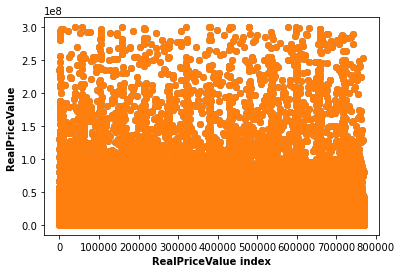

In [82]:
index=[]
for i in range(ensemble.size):
    index.append(i)
    
plt.figure(figsize =(30,10))
fig,ax = plt.subplots()
ax.scatter(x = index, y = RealPriceValue[:ensemble.size])
plt.xlabel('RealPriceValue index', fontweight = "bold")               
plt.ylabel("RealPriceValue ", fontweight = "bold")


plt.scatter(index,RealPriceValue[:ensemble.size])
plt.draw()

<Figure size 2160x720 with 0 Axes>

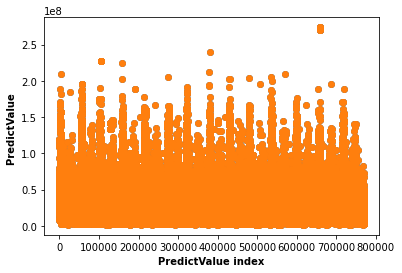

In [83]:
plt.figure(figsize =(30,10))
fig,ax = plt.subplots()
ax.scatter(x = index, y = ensemble)
plt.xlabel('PredictValue index', fontweight = "bold")               
plt.ylabel("PredictValue ", fontweight = "bold")

plt.scatter(index,ensemble)
plt.draw()

In [84]:
ensemble.max()

273871986.3753284

In [85]:
ensemble.min()

1177609.389810032

In [86]:
ensemble.mean()

20443972.105565675